### Importing and Merging Data:

In [100]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [101]:
#Importing
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
#showing all the columns
pd.set_option("max_columns",100)

In [103]:
# Importing the dataset
Lead = pd.read_csv("Leads.csv")
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [104]:
Lead.shape

(9240, 37)

In [105]:
#Dataset info
Lead.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [106]:
#Summary of all numerical columns
Lead.describe(percentiles=[0.05,0.25,0.50,0.75,0.9,0.95])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
5%,582869.900000,0.000000,0.000000,0.000000,0.000000,12.000000,14.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000


### Data cleaning and EDA

In [107]:
#Checking null value percentages
(Lead.isnull().sum().sort_values(ascending=False)/len(Lead))*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

##### We can drop the attributes Prospect ID and Lead Number as they are only unique ID's and won't be having any impact on the model

In [108]:
#Dropping prospect ID and lead number
Lead = Lead.drop(["Prospect ID","Lead Number"],axis=1)
Lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [109]:
Lead.shape

(9240, 35)

In [110]:
#Dropping columns having more than 3000 missing values to be on the safer side
for c in Lead.columns:
    if Lead[c].isnull().sum()>3000:
        Lead.drop(c,axis=1,inplace=True)

In [111]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [112]:
#Dropping city and country columns
Lead = Lead.drop(["City","Country"],axis=1)
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

##### There are still few columns existing which contains larger missing values. Let's see if they can be dropped or not.

In [113]:
Lead["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [114]:
Lead["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [115]:
Lead["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [116]:
Lead["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [117]:
Lead["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

##### Let's drop the couple of columns where the record "select" is more which can be treated as null values here as those do not imply to anything.

In [118]:
Lead = Lead.drop(["How did you hear about X Education"], axis=1)

In [119]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Specialization                                 7802 

In [120]:
for c in Lead.columns:
    print(Lead[c].astype("category").value_counts())
    print("\n\n==========================================================\n\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64




Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64




No     8506
Yes     734
Name: Do Not Email, dtype: int64




No     9238
Yes       2
Name: Do Not Call, dtype: int64




0    5679
1    3561
Name: Converted, dtype: int64




0.0      2189
2.0      1680
3.0      1306
4.0  

In [121]:
Lead = Lead.drop(["Do Not Email","Do Not Call","What matters most to you in choosing a course","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","A free copy of Mastering The Interview"],axis=1)
Lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Select,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Select,Modified


In [122]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9204 non-null   object 
 2   Converted                        9240 non-null   int64  
 3   TotalVisits                      9103 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9103 non-null   float64
 6   Last Activity                    9137 non-null   object 
 7   Specialization                   7802 non-null   object 
 8   What is your current occupation  6550 non-null   object 
 9   Lead Profile                     6531 non-null   object 
 10  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 794.2+ KB


In [123]:
for c in Lead.columns:
    print(Lead[c].astype("category").value_counts())
    print("\n\n==========================================================\n\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64




Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64




0    5679
1    3561
Name: Converted, dtype: int64




0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86


##### Now, there's the column What is your current occupation which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.

In [124]:
#Considering only those values for occupation where it is not null

Lead = Lead[~pd.isnull(Lead['What is your current occupation'])]

In [125]:
# Drop the null value rows in the column 'TotalVisits'

Lead = Lead[~pd.isnull(Lead['TotalVisits'])]

In [126]:
# Drop the null value rows in the column 'Lead source'

Lead = Lead[~pd.isnull(Lead['Lead Source'])]

In [127]:
# Drop the null value rows in the column 'Specialization'

Lead = Lead[~pd.isnull(Lead['Specialization'])]

In [128]:
#Checking the cleaned dataset

Lead.shape

(6373, 11)

In [129]:
Lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Lead Profile,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Potential Lead,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Select,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Select,Modified


In [130]:
Lead.isnull().sum()

Lead Origin                        0
Lead Source                        0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
Lead Profile                       1
Last Notable Activity              0
dtype: int64

In [131]:
#Dropping the column Lead Profile as well as most of the values are missing and contains select i.e null as considered here

Lead = Lead.drop("Lead Profile",axis=1)

In [132]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      6373 non-null   object 
 1   Lead Source                      6373 non-null   object 
 2   Converted                        6373 non-null   int64  
 3   TotalVisits                      6373 non-null   float64
 4   Total Time Spent on Website      6373 non-null   int64  
 5   Page Views Per Visit             6373 non-null   float64
 6   Last Activity                    6373 non-null   object 
 7   Specialization                   6373 non-null   object 
 8   What is your current occupation  6373 non-null   object 
 9   Last Notable Activity            6373 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 547.7+ KB


#### Visualisations

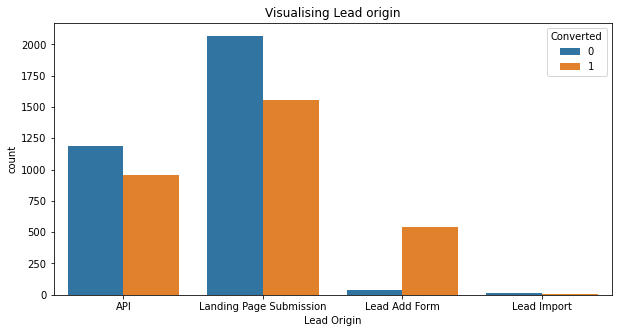

In [133]:
#Lead Origin with target variable

plt.figure(figsize=[10,5])
sns.countplot(x="Lead Origin",hue="Converted",data=Lead)
plt.title("Visualising Lead origin")
plt.show()

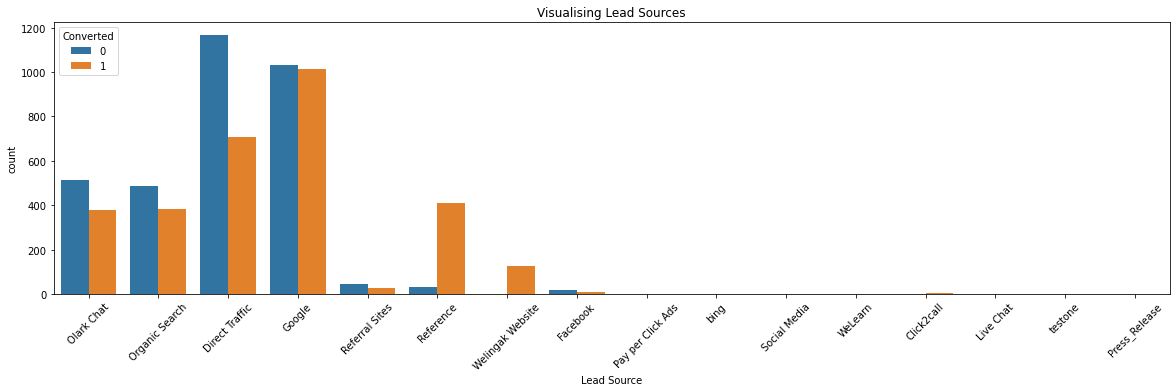

In [134]:
#Lead Source with target variable

plt.figure(figsize=[20,5])
sns.countplot(x="Lead Source",hue="Converted",data=Lead)
plt.title("Visualising Lead Sources")
plt.xticks(rotation=45)
plt.show()

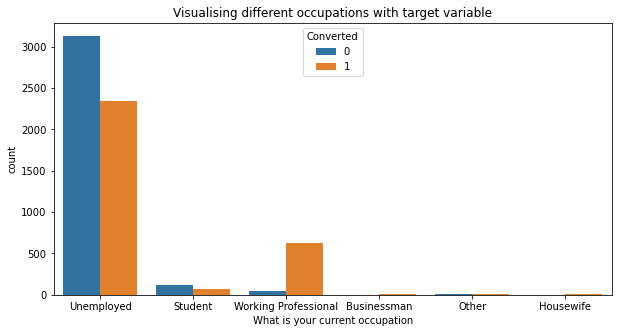

In [135]:
#Checking the counts for different occupations with target variable

plt.figure(figsize=[10,5])
sns.countplot(x="What is your current occupation",hue="Converted",data=Lead)
plt.title("Visualising different occupations with target variable")
plt.show()

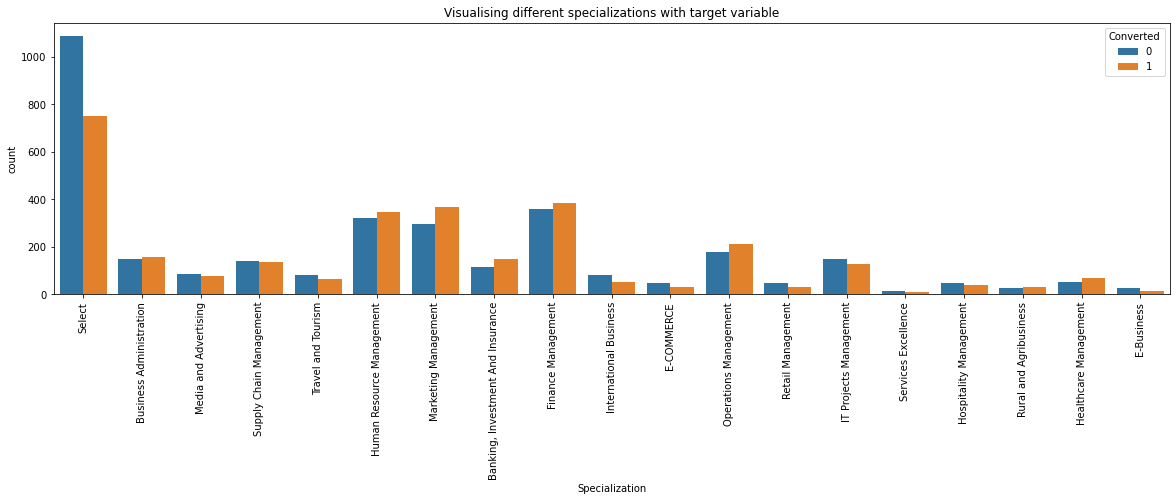

In [136]:
#Specialization column 

plt.figure(figsize=[20,5])
sns.countplot(x="Specialization",hue="Converted",data=Lead)
plt.title("Visualising different specializations with target variable")
plt.xticks(rotation=90)
plt.show()

### Creating dummy variables for the categorical variables

In [137]:
# Check the columns which are of type 'object'

temp = Lead.loc[:, Lead.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [138]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(Lead[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Lead = pd.concat([Lead, dummy], axis=1)

In [139]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(Lead['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
Lead = pd.concat([Lead, dummy_spl], axis = 1)

In [140]:
# Drop the variables for which the dummy variables have been created

Lead = Lead.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation','Last Notable Activity'], 1)

In [141]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6373 non-null   int64  
 1   TotalVisits                                           6373 non-null   float64
 2   Total Time Spent on Website                           6373 non-null   int64  
 3   Page Views Per Visit                                  6373 non-null   float64
 4   Lead Origin_Landing Page Submission                   6373 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6373 non-null   uint8  
 6   Lead Origin_Lead Import                               6373 non-null   uint8  
 7   Lead Source_Direct Traffic                            6373 non-null   uint8  
 8   Lead Source_Facebook                                  6373

### Model building and evaluation

In [142]:
#Scaling the numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Lead[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(Lead[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
Lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.019920,0.296655,0.045455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.007968,0.674296,0.036364,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.003984,0.134243,0.018182,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0.007968,0.628521,0.018182,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
#Train, test and split

from sklearn.model_selection import train_test_split

In [144]:
#Putting all the feature variables in X and the target variable in y

X = Lead.drop(['Converted'], 1)
y = Lead["Converted"]

In [145]:
#Dividing the dataset into 70% and 30% for train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [146]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [147]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 11)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [148]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 58),
 ('Lead Source_Google', False, 33),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 32),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 47),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 34),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 31),
 ('Lead Source_testone', False, 41),
 ('Last Activity_Converted to Lead', False, 37),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 56),
 ('Last Act

In [149]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [150]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [151]:
# Import statsmodels

import statsmodels.api as sm

In [152]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2192.3
Date:                Tue, 14 Sep 2021   Deviance:                       4384.7
Time:                        23:59:18   Pearson chi2:                 4.76e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4278      0.559     -0.765      0.444      -1.524       0.668
TotalVisits                                              8.0630      2.676      3.013      0.003       2.818      13.308
Total Time Spent on Website                              4.5100      0.180     25.033      0.000       4.157       4.863
Lead Origin_Lead Add Form                                4.1936      0.255     16.459      0.000       3.694       4.693
Lead Source_Olark Chat                                   1.3992      0.118     11.821      0.000       1.167       1.631
Lead Source_Welingak Website                             2.2418      1.034      2.168      0.030       0.215       4.268
Last Activity_Email Bounced                             -2.0859      0.365     -5.707      0.000      -2.802      -1.370
What is your current occupation_Student                 -1.4988      0.590     -2.540      0.011      -2.656      -0.342
What is your current occupation_Unemployed              -1.5198      0.555     -2.740      0.006      -2.607      -0.433
What is your current occupation_Working Professional     1.1423      0.585      1.953      0.051      -0.004       2.289
Last Notable Activity_Had a Phone Conversation          22.9032   1.24e+04      0.002      0.999   -2.44e+04    2.44e+04
Last Notable Activity_Unreachable                        2.4327      0.807      3.015      0.003       0.851       4.014
========================================================================================================================
"""

In [153]:
X_train.drop("Last Notable Activity_Had a Phone Conversation",axis=1,inplace=True)

In [154]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2201.5
Date:                Tue, 14 Sep 2021   Deviance:                       4403.0
Time:                        23:59:18   Pearson chi2:                 4.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4364      0.559     -0.781      0.435      -1.532       0.659
TotalVisits                                              8.6074      2.703      3.184      0.001       3.310      13.905
Total Time Spent on Website                              4.4892      0.180     24.992      0.000       4.137       4.841
Lead Origin_Lead Add Form                                4.1885      0.255     16.436      0.000       3.689       4.688
Lead Source_Olark Chat                                   1.3941      0.118     11.773      0.000       1.162       1.626
Lead Source_Welingak Website                             2.2413      1.034      2.168      0.030       0.215       4.268
Last Activity_Email Bounced                             -2.0893      0.365     -5.721      0.000      -2.805      -1.373
What is your current occupation_Student                 -1.4905      0.590     -2.527      0.011      -2.646      -0.335
What is your current occupation_Unemployed              -1.5056      0.554     -2.717      0.007      -2.592      -0.419
What is your current occupation_Working Professional     1.1512      0.584      1.970      0.049       0.006       2.297
Last Notable Activity_Unreachable                        2.4219      0.807      3.003      0.003       0.841       4.003
========================================================================================================================
"""

In [155]:
X_train.drop("What is your current occupation_Working Professional",axis=1,inplace=True)

In [156]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4451
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2203.2
Date:                Tue, 14 Sep 2021   Deviance:                       4406.4
Time:                        23:59:18   Pearson chi2:                 4.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.6228      0.191      3.263      0.001       0.249       0.997
TotalVisits                                    8.4316      2.693      3.130      0.002       3.153      13.710
Total Time Spent on Website                    4.4903      0.180     25.001      0.000       4.138       4.842
Lead Origin_Lead Add Form                      4.1881      0.255     16.441      0.000       3.689       4.687
Lead Source_Olark Chat                         1.3931      0.118     11.778      0.000       1.161       1.625
Lead Source_Welingak Website                   2.2393      1.034      2.166      0.030       0.213       4.266
Last Activity_Email Bounced                   -2.0794      0.364     -5.714      0.000      -2.793      -1.366
What is your current occupation_Student       -2.5475      0.272     -9.375      0.000      -3.080      -2.015
What is your current occupation_Unemployed    -2.5623      0.183    -14.024      0.000      -2.920      -2.204
Last Notable Activity_Unreachable              2.4213      0.807      3.001      0.003       0.840       4.003
==============================================================================================================
"""

#### Now as p-values look fine, we can go for the predictions

In [157]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.158060
218     0.192232
4171    0.170257
4037    0.366687
3660    0.904527
207     0.256541
2044    0.242485
6411    0.965652
6498    0.054687
2085    0.988881
dtype: float64

In [158]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15806049, 0.19223242, 0.17025703, 0.36668729, 0.90452654,
       0.25654148, 0.24248455, 0.96565166, 0.05468709, 0.98888083])

In [159]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.158060
1,0,0.192232
2,1,0.170257
3,1,0.366687
4,1,0.904527


In [160]:
#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.158060,0
1,0,0.192232,0
2,1,0.170257,0
3,1,0.366687,0
4,1,0.904527,1


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [161]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [162]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1927  385]
 [ 645 1504]]


In [163]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7691100650078457


In [164]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Calculate the sensitivity

TP/(TP+FN)

0.699860400186133

In [166]:
# Calculate the specificity

TN/(TN+FP)

0.8334775086505191

#### Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [167]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [168]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

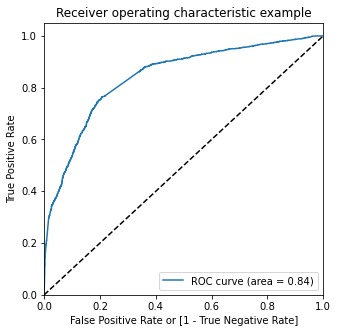

In [169]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Area under the ROC curve should be near to 1. We got the area as 0.84 which looks good.

In [170]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.158060,0,1,1,0,0,0,0,0,0,0,0
1,0,0.192232,0,1,1,0,0,0,0,0,0,0,0
2,1,0.170257,0,1,1,0,0,0,0,0,0,0,0
3,1,0.366687,0,1,1,1,1,0,0,0,0,0,0
4,1,0.904527,1,1,1,1,1,1,1,1,1,1,1


In [171]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.501681  0.997673  0.040657
0.2   0.2  0.646043  0.942299  0.370675
0.3   0.3  0.748711  0.886459  0.620675
0.4   0.4  0.778525  0.751047  0.804066
0.5   0.5  0.769110  0.699860  0.833478
0.6   0.6  0.747366  0.612378  0.872837
0.7   0.7  0.718449  0.511866  0.910467
0.8   0.8  0.681910  0.390414  0.952855
0.9   0.9  0.652320  0.295486  0.983997


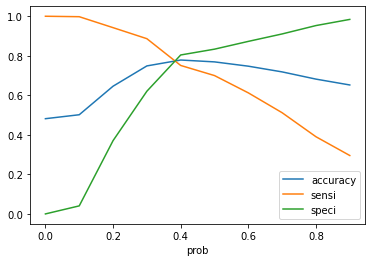

In [172]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As we can see that around 0.40, we get the optimal values of the three metrics. So let's choose 0.40 as our cutoff now.

In [173]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.158060,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.192232,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.170257,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.366687,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.904527,1,1,1,1,1,1,1,1,1,1,1,1


In [174]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.777404169468729

#### Making Predictions on the Test Set
Let's now make predicitons on the test set.

In [175]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,1,0,0,0


In [176]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [177]:
X_test_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [178]:
X_test.drop("What is your current occupation_Working Professional",axis=1,inplace=True)

In [179]:
X_test.drop("Last Notable Activity_Had a Phone Conversation",axis=1,inplace=True)

In [180]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [181]:
y_test_pred[:10]

4771    0.991925
6122    0.171657
9202    0.516607
6570    0.465777
2668    0.525971
4233    0.882448
3368    0.784785
9091    0.547099
5972    0.150079
3631    0.622287
dtype: float64

In [182]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4771,0.991925
6122,0.171657
9202,0.516607
6570,0.465777
2668,0.525971


In [183]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [184]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.991925
1,0,0.171657
2,0,0.516607
3,1,0.465777
4,1,0.525971


In [186]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.991925
1,0,0.171657
2,0,0.516607
3,1,0.465777
4,1,0.525971


In [187]:
# Make predictions on the test set using 0.40 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)

In [188]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7761506276150628

In [189]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[800, 196],
       [232, 684]], dtype=int64)

In [190]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [191]:
# Calculate sensitivity
TP / float(TP+FN)

0.7467248908296943

In [192]:
# Calculate specificity
TN / float(TN+FP)

0.8032128514056225

In [193]:
# Calculate Precision

TP/(TP+FP)

0.7772727272727272

In [194]:
# Calculate Recall

TP/(TP+FN)

0.7467248908296943

In [195]:
feature_names = X_test.columns

In [196]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_test, y_test)
importances = pd.DataFrame(data={
    'Attribute': X_test.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [197]:
importances

,Attribute,Importance
1,Total Time Spent on Website,4.095704
2,Lead Origin_Lead Add Form,2.910298
4,Lead Source_Welingak Website,1.317481
8,Last Notable Activity_Unreachable,1.076095
3,Lead Source_Olark Chat,1.060651
0,TotalVisits,0.187821
5,Last Activity_Email Bounced,-1.780038
7,What is your current occupation_Unemployed,-2.064364
6,What is your current occupation_Student,-2.487860
